**Exploratory Data Analysis (EDA):**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [ ]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [ ]:
df.duplicated().sum()

np.int64(1024)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

**Data Preprocessing:**

In [ ]:
#converting categorical to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder={}
for column in df.select_dtypes(include=['object']).columns:
    label_encoder[column]=LabelEncoder()
    df[column] = label_encoder[column].fit_transform(df[column])
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,1,1,0,0,4,3,1,0,3,...,1,0,0,3,1,2,3,0,13.020616,9.993008
1988,926,0,1,4,1,1,1,2,0,1,...,0,0,2,5,8,2,0,1,3.751597,18.868135
1989,289,4,3,5,1,1,1,1,1,2,...,1,1,2,4,5,0,0,0,13.134058,15.740028
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957


**Data Visualization:**

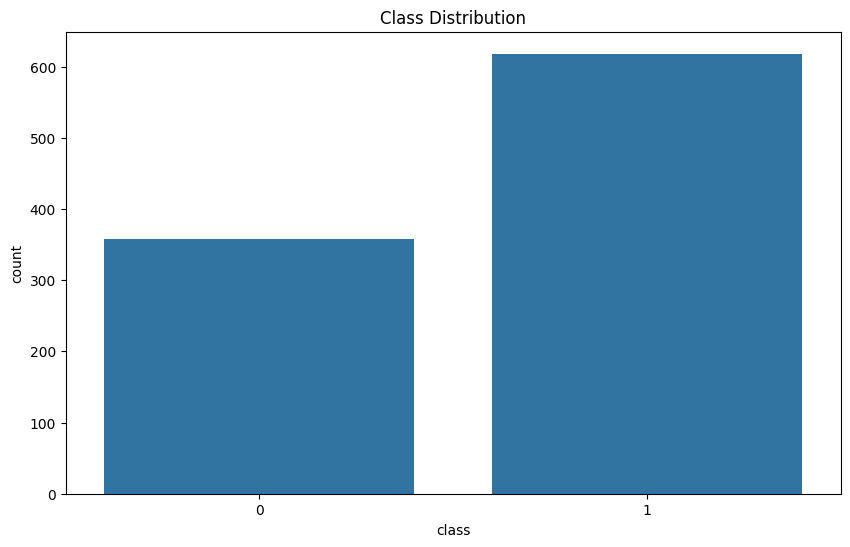

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

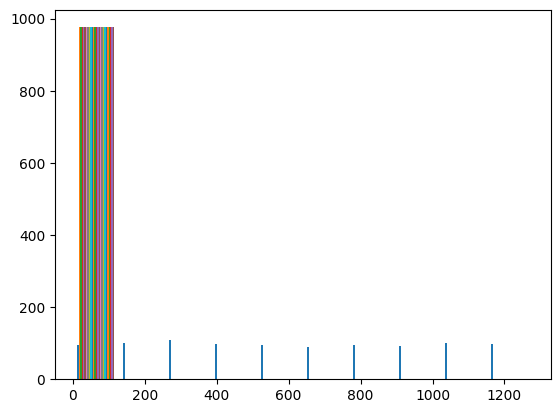

In [ ]:
plt.hist(df)
plt.show()

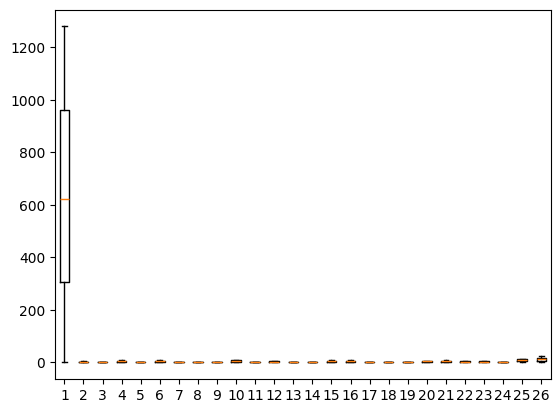

In [ ]:
plt.boxplot(df)
plt.show()

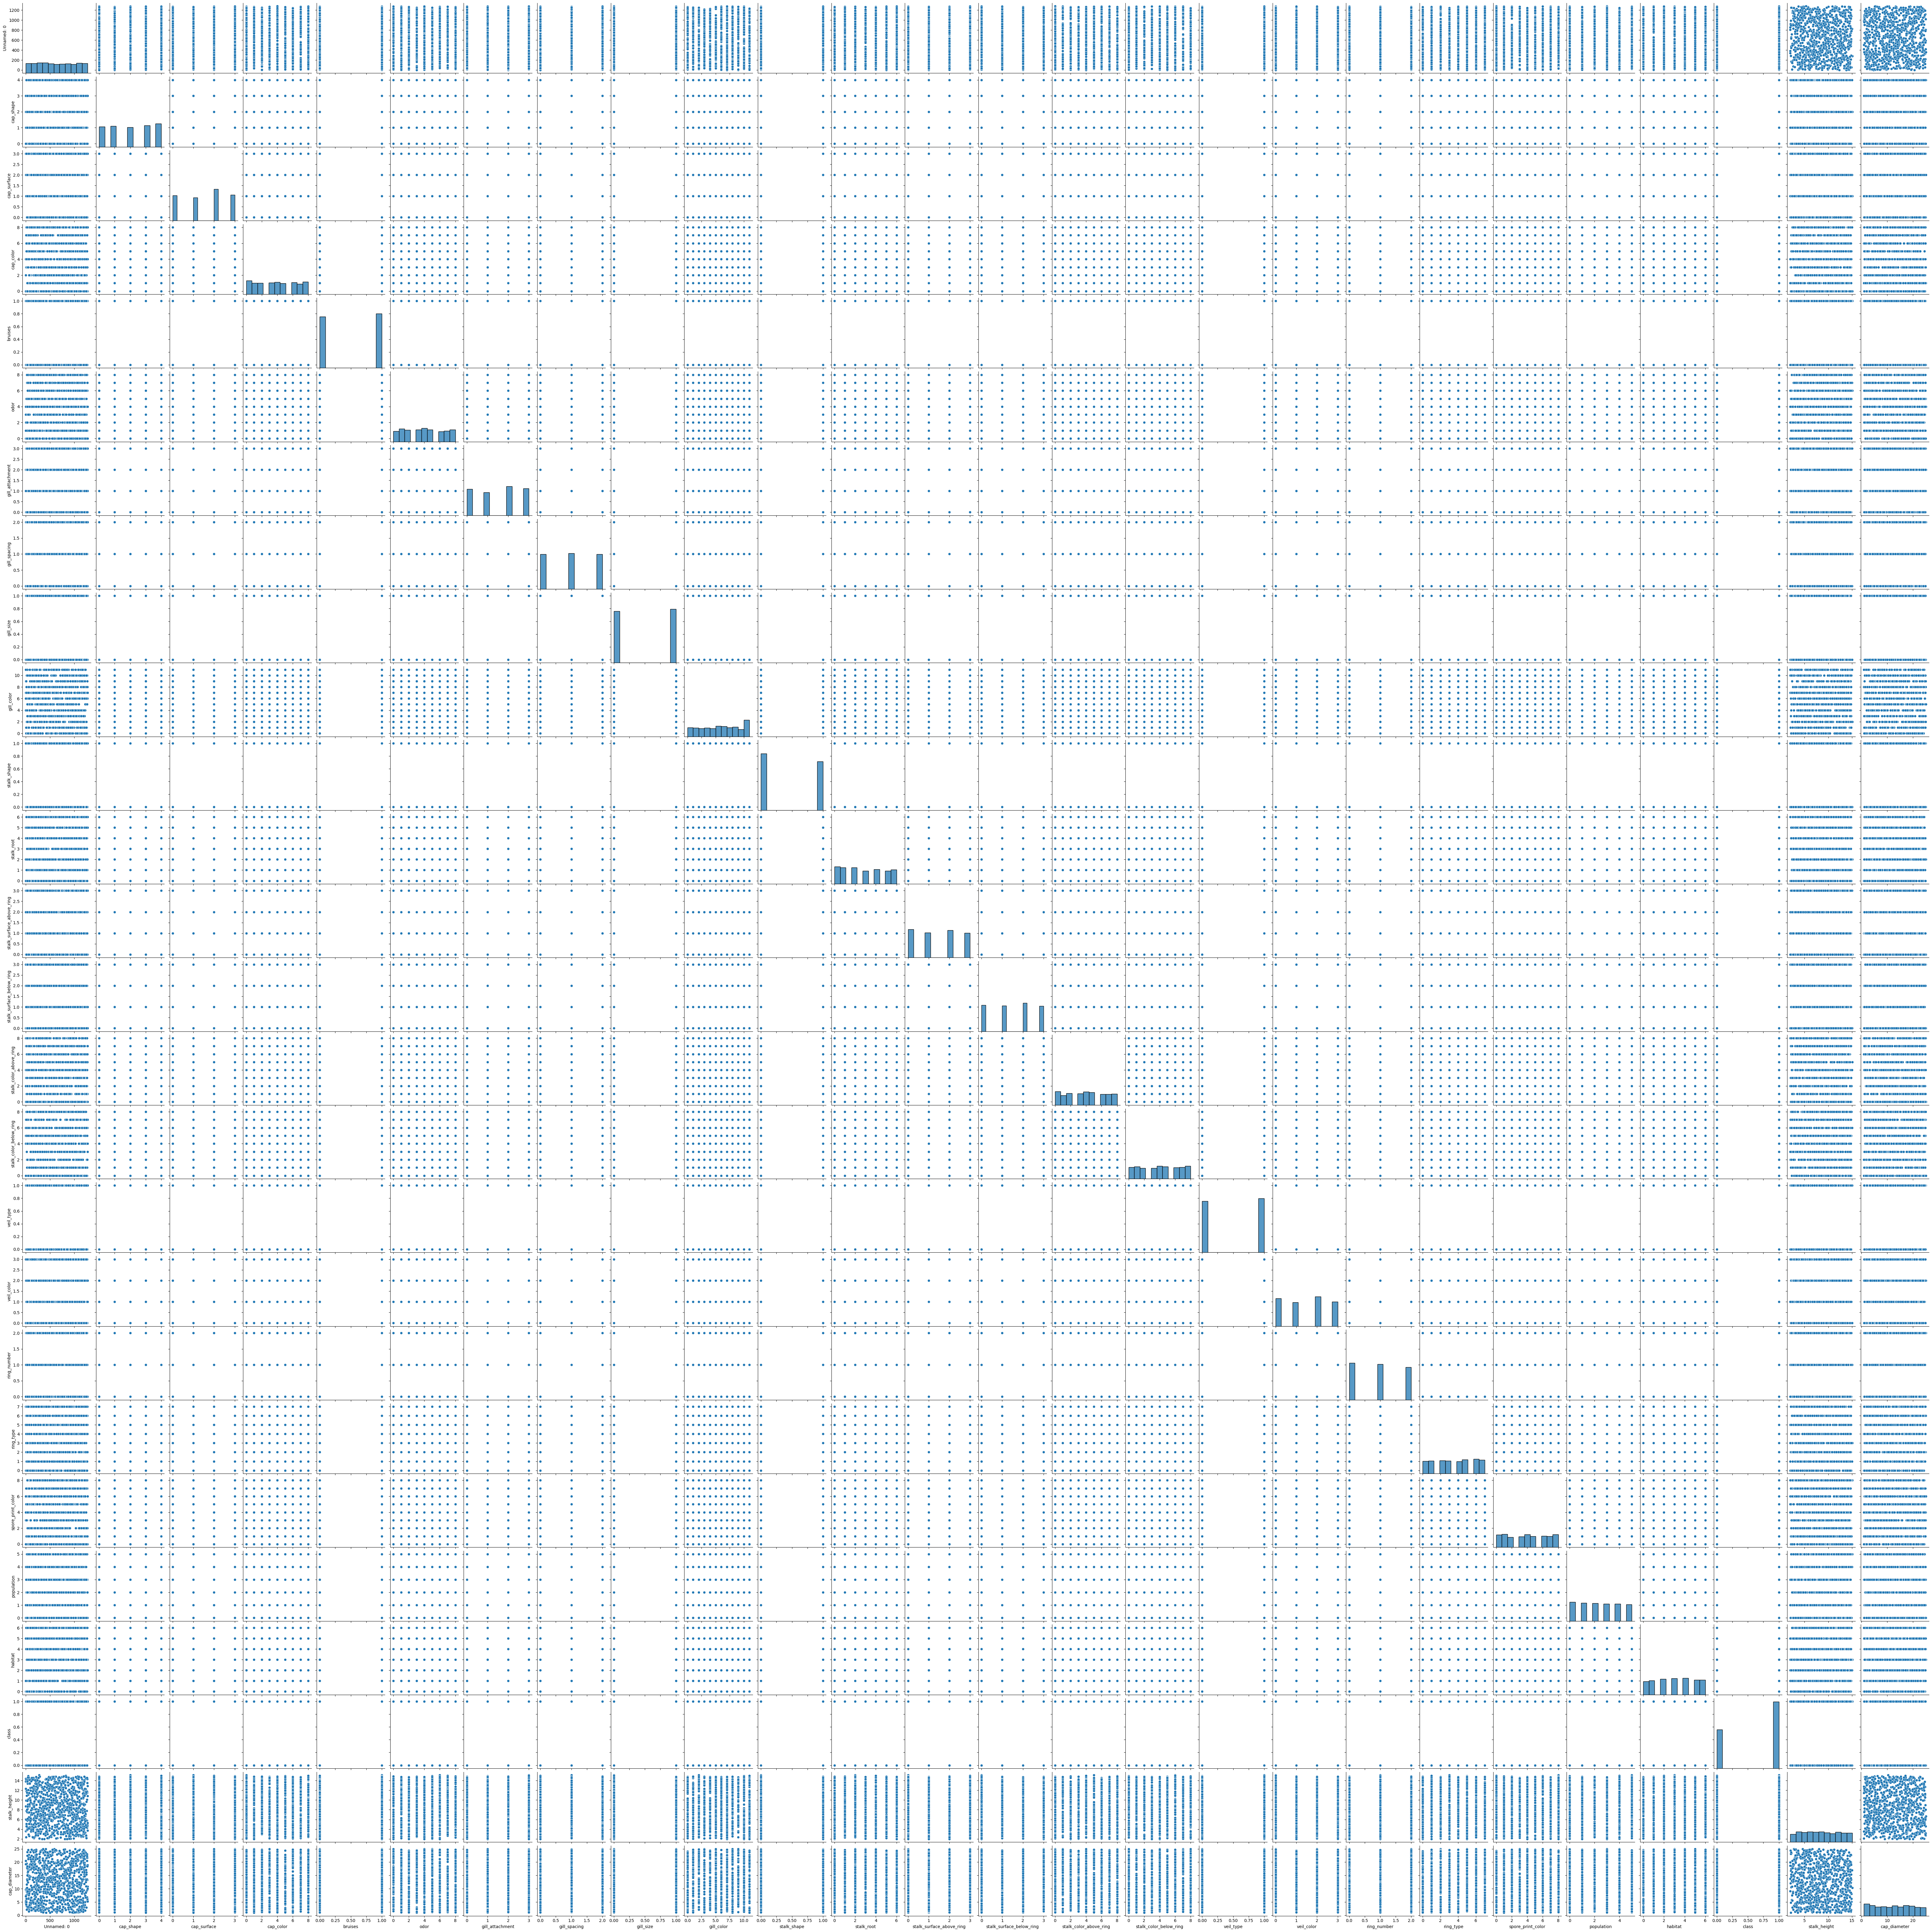

In [ ]:
sns.pairplot(df)

In [ ]:
# Convert all float values to integers
df= df.applymap(lambda x: int(round(x)) if isinstance(x, float) else x)
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14,5
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,4,19
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9,7
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5,21
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,1,1,0,0,4,3,1,0,3,...,1,0,0,3,1,2,3,0,13,10
1988,926,0,1,4,1,1,1,2,0,1,...,0,0,2,5,8,2,0,1,4,19
1989,289,4,3,5,1,1,1,1,1,2,...,1,1,2,4,5,0,0,0,13,16
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,7,14


In [ ]:
X = df.drop('cap_diameter', axis=1)
Y = df['cap_diameter']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
x_train,y_train

(      Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
 990          567          2            0          0        0     0   
 899          104          4            2          5        1     5   
 33           699          1            0          4        0     2   
 31           277          2            0          6        1     7   
 1591         940          3            3          7        0     3   
 ...          ...        ...          ...        ...      ...   ...   
 110          602          2            2          3        0     8   
 301          134          1            0          0        1     6   
 1512         276          3            1          8        0     1   
 536           51          2            3          4        1     0   
 105         1147          4            3          1        0     4   
 
       gill_attachment  gill_spacing  gill_size  gill_color  ...  \
 990                 3             1          0          10  ...   
 899      

In [ ]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train,x_test

(array([[-0.17799506, -0.0286743 , -1.4104593 , ..., -0.52912275,
         -1.31425748, -0.41649297],
        [-1.41798608,  1.36919761,  0.3960403 , ..., -0.01451459,
         -1.31425748,  0.92925896],
        [ 0.1755229 , -0.72761025, -1.4104593 , ...,  0.50009358,
          0.76088591,  0.39095819],
        ...,
        [-0.95734146,  0.67026166, -0.5072095 , ..., -0.52912275,
         -1.31425748, -1.22394413],
        [-1.55992889, -0.0286743 ,  1.29929009, ...,  0.50009358,
          0.76088591, -0.41649297],
        [ 1.37534143,  1.36919761,  1.29929009, ...,  1.5293099 ,
          0.76088591,  0.1218078 ]]),
 array([[ 1.43961742, -1.42654621,  1.29929009, ..., -1.04373092,
          0.76088591, -1.22394413],
        [-0.05212124,  0.67026166, -1.4104593 , ...,  1.5293099 ,
          0.76088591, -0.68564335],
        [-0.45652436, -0.0286743 ,  1.29929009, ...,  0.50009358,
          0.76088591, -1.7622449 ],
        ...,
        [-0.36011037,  1.36919761, -1.4104593 , ..., -

**SVM Implementation:**

In [ ]:
from sklearn import svm
svm_model=svm.SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svm_model.predict(x_test)
y_pred

array([18, 25, 21,  5, 11,  5,  6,  9, 18,  5, 18, 24, 16, 12, 12,  7, 25,
       22, 24, 25, 17,  6,  7, 18,  5,  7,  6,  5, 14,  9,  4,  3, 23,  1,
       14,  4,  1, 10, 19,  9, 11,  2, 17, 11, 20, 24, 10,  5, 23, 25, 24,
       10,  1,  5, 15,  4,  7, 13, 18, 17,  6, 16, 21,  5, 14, 11, 21, 24,
       11, 22, 23,  2, 18, 22, 11,  4, 17,  5, 10, 13, 18, 23,  5, 23, 24,
       10,  2,  8,  3,  8, 21, 23, 14,  8, 10, 25, 10,  5, 10,  3,  3,  6,
        5,  8, 20, 20,  5,  5, 12, 20, 18, 12,  3,  3, 13, 12, 20,  5, 11,
       19,  8, 22,  2, 10, 20, 18, 17,  6, 11,  9, 12,  2, 14, 14, 24,  4,
        5,  2, 17, 23,  5, 19,  2,  9, 21, 21, 18,  5, 16,  2, 18, 21, 15,
       17, 23, 19, 16,  3, 22, 14, 20,  5, 19,  5, 17, 23,  2,  5, 23, 16,
       23, 23, 17, 21, 17,  5,  3,  8,  9,  5,  3, 22, 17, 18, 19, 17, 11,
        8, 23, 23, 24, 16, 18,  7, 22,  4])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cf=classification_report(y_pred,y_test)
print('classification_report',cf)


classification_report               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         9
           3       0.09      0.11      0.10         9
           4       0.00      0.00      0.00         6
           5       0.18      0.09      0.12        23
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         7
           9       0.10      0.17      0.12         6
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         3
          14       0.08      0.14      0.11         7
          15       0.00      0.00      0.00         2
          16       0.07      0.17      0.10         6
          17       0.10      0.08      0.09        12
     

In [ ]:
accuracy=accuracy_score(y_pred,y_test)
print('accuracy',accuracy)

accuracy 0.05102040816326531


In [ ]:
confusion_matrix=confusion_matrix(y_pred,y_test)
print('confusion_matrix',confusion_matrix)

confusion_matrix [[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 1 1 0 2 0 0 0 0]
 [0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 2 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0]
 [1 1 1 1 2 0 0 3 0 3 1 0 0 0 2 2 2 1 0 2 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0]
 [1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 1 0 0 0 0 0 1 2 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 1 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 2 1 0 0 0 0 0 1 0 0]
 [1 0 1 1 1 0 2 0 2 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1]
 [0 0 1 1 0 1 0 0 0 0 0 0 1 0

**Visualization of SVM Results:**

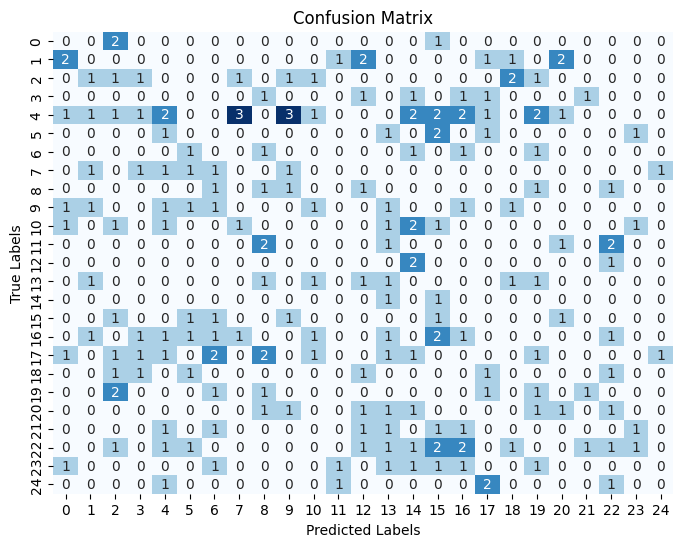

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Experiment with different SVM hyperparameters
# Example: Experimenting with different kernel types
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Kernel:", kernel)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Kernel: linear
Accuracy: 0.05102040816326531
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.11      0.09      0.10        11
           4       0.00      0.00      0.00         6
           5       0.09      0.18      0.12        11
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         6
           9       0.17      0.10      0.12        10
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         9
          14       0.14      0.08      0.11        12
          15       0.00      0.00      0.00        12
          16       0.17      0.07      0.10        14
          17       0.08      0.10   